
# 1. Load and Understand the Data


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [10]:

# Load the dataset
try:
    df = pd.read_csv('EMPLOYEE_TURNOVER.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: EMPLOYEE_TURNOVER.csv not found. Please make sure the file is in the correct directory.")
    exit()

Dataset loaded successfully!


In [14]:
# Display the first few rows
print("\n--- First 5 rows of the dataset ---")
print(df.head())


--- First 5 rows of the dataset ---
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

 

In [15]:
# Check the data types and non-null values
print("\n--- Dataset Info ---")
df.info()



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          quit  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%      

In [17]:
# Check for missing values
print("\n--- Missing Values Count ---")
print(df.isnull().sum())


--- Missing Values Count ---
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [18]:
# Check unique values for categorical columns
print("\n--- Unique values in categorical columns ---")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


--- Unique values in categorical columns ---
department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary: ['low' 'medium' 'high']


# 2: Exploratory Data Analysis (EDA)

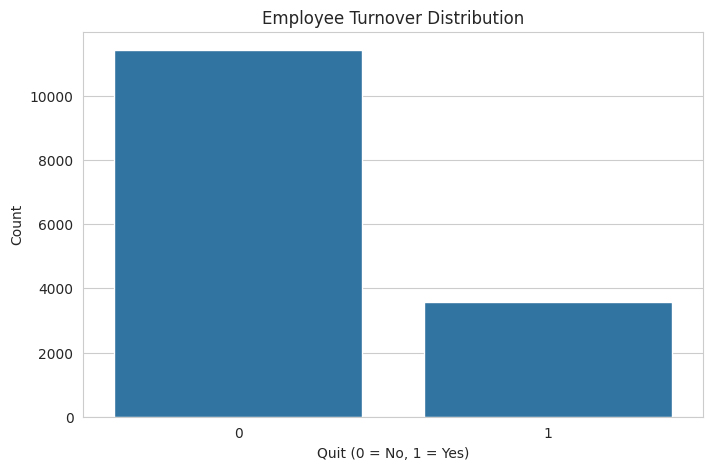

In [19]:
# Set style for plots
sns.set_style("whitegrid")

# 1. Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quit', data=df)
plt.title('Employee Turnover Distribution')
plt.xlabel('Quit (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


--- Target Variable (quit) Distribution ---
quit
0    11428
1     3571
Name: count, dtype: int64
Turnover Rate: 23.81%


/tmp/ipython-input-20-3076562797.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quit', data=df, palette='viridis')
/tmp/ipython-input-20-3076562797.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
/tmp/ipython-input-20-3076562797.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
/tmp/ipython-input-20-3076562797.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
/tmp/ipython-input-20-3076562797.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
/tmp

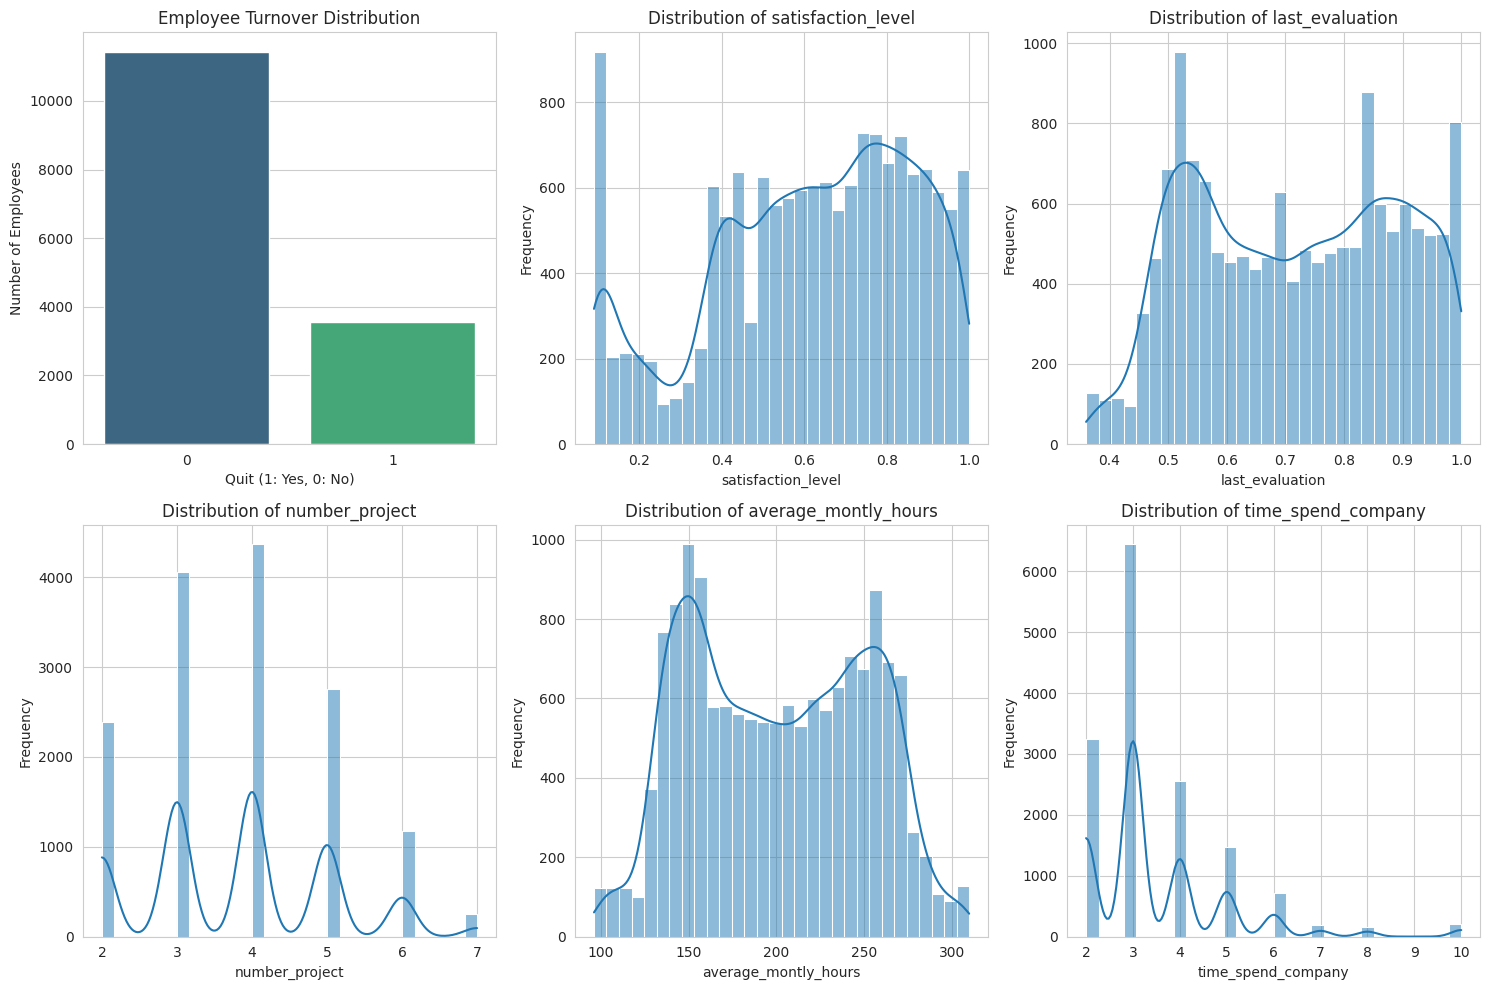

In [20]:
# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# --- Target Variable Analysis ---
print("\n--- Target Variable (quit) Distribution ---")
plt.subplot(2, 3, 1)
sns.countplot(x='quit', data=df, palette='viridis')
plt.title('Employee Turnover Distribution')
plt.xlabel('Quit (1: Yes, 0: No)')
plt.ylabel('Number of Employees')
quit_counts = df['quit'].value_counts()
print(quit_counts)
print(f"Turnover Rate: {quit_counts[1] / len(df) * 100:.2f}%")

# --- Univariate Analysis (Numerical Features) ---
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 2)
    sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




/tmp/ipython-input-21-65349282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/tmp/ipython-input-21-65349282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/tmp/ipython-input-21-65349282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/tmp/ipython-input-21-65349282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend

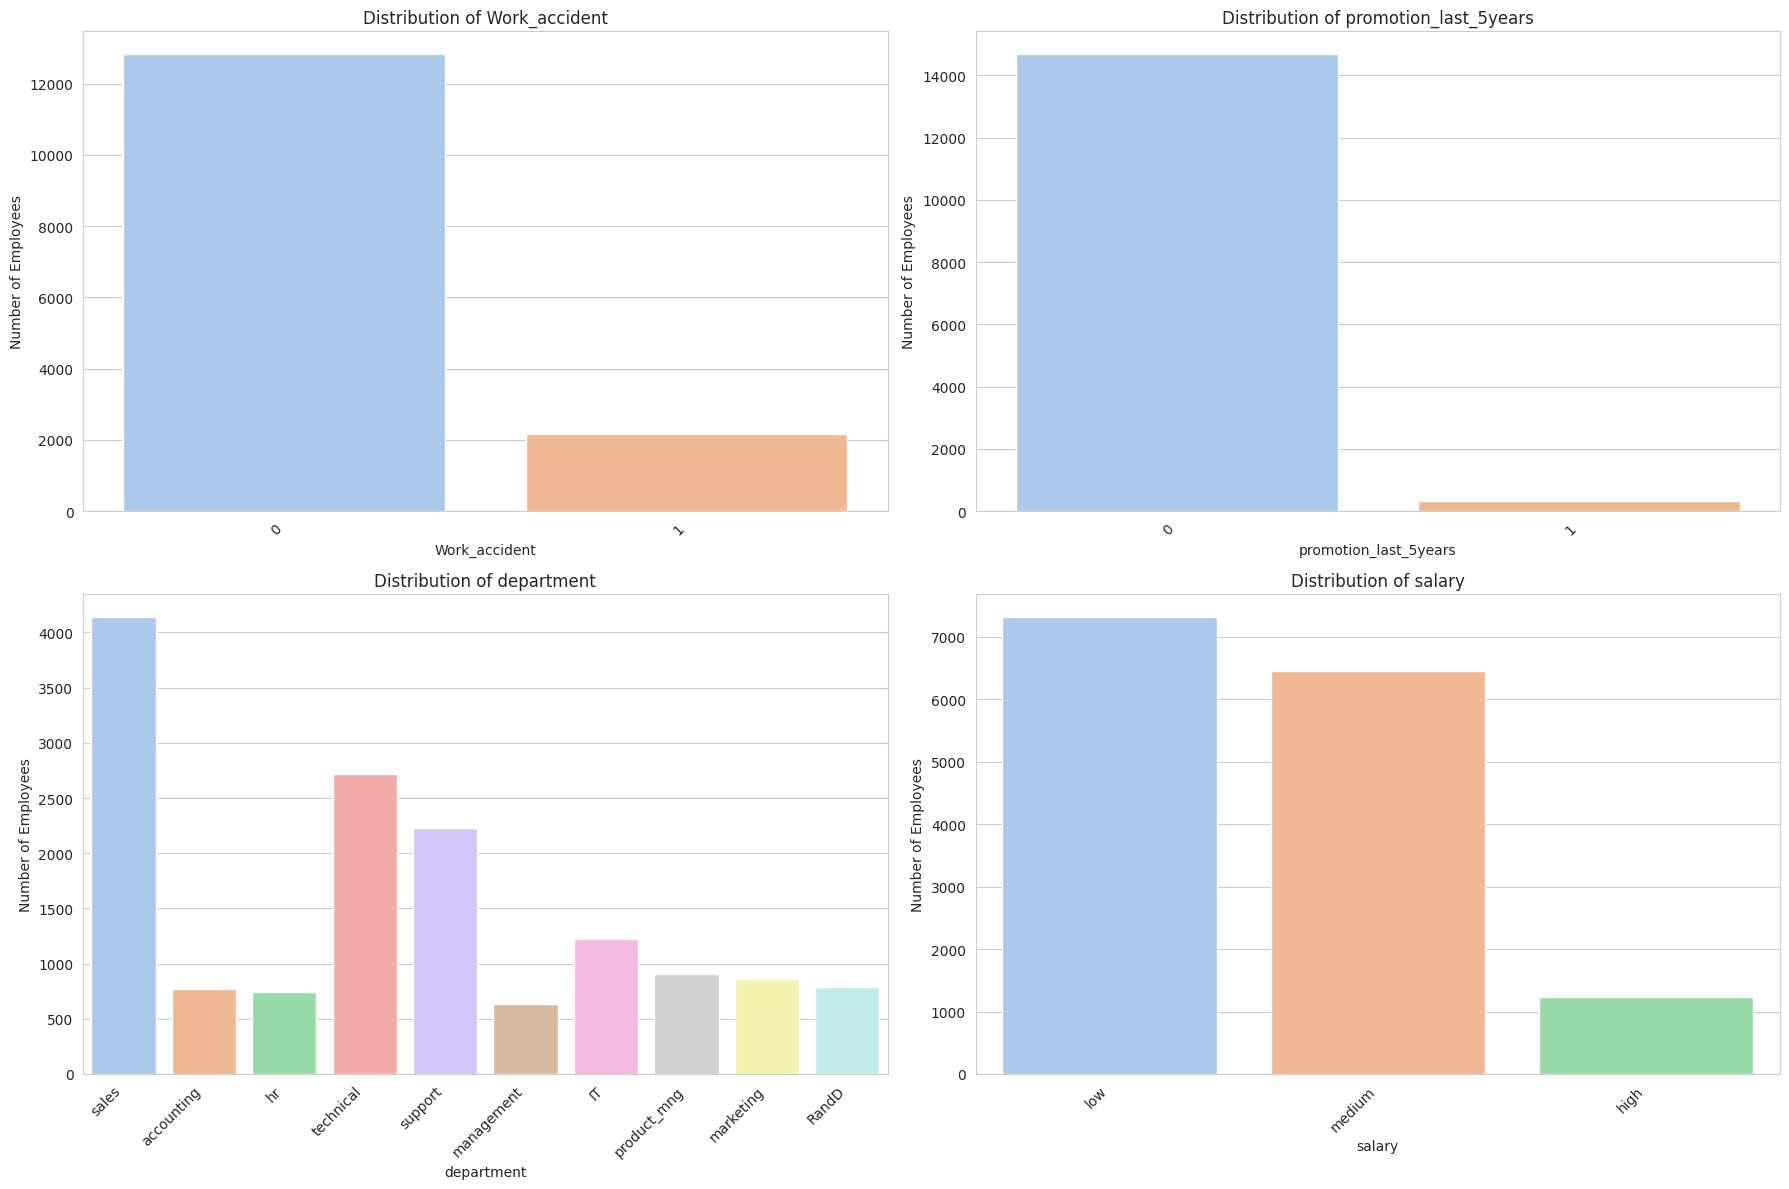

In [21]:
# --- Univariate Analysis (Categorical Features) ---
categorical_cols = ['Work_accident', 'promotion_last_5years', 'department', 'salary']
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


/tmp/ipython-input-23-1230977185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
/tmp/ipython-input-23-1230977185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
/tmp/ipython-input-23-1230977185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
/tmp/ipython-input-23-1230977185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

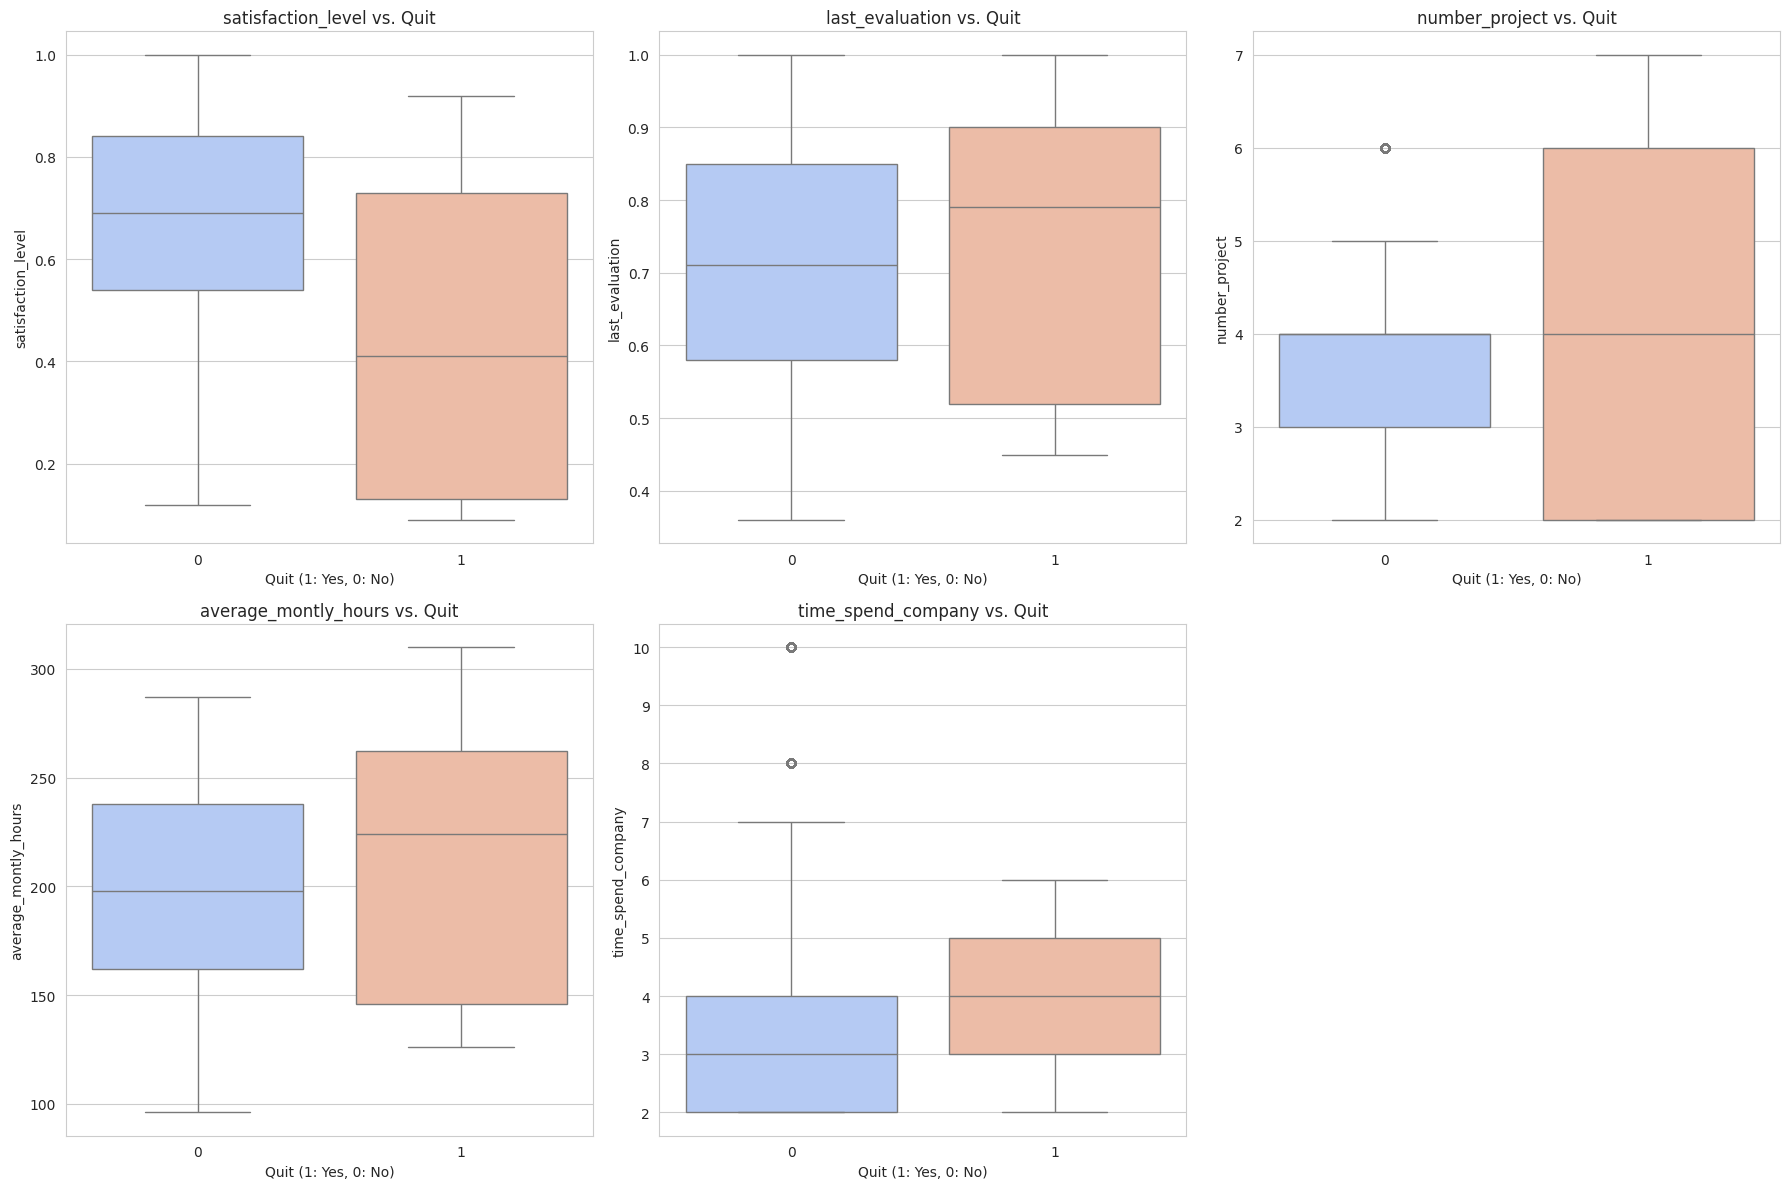

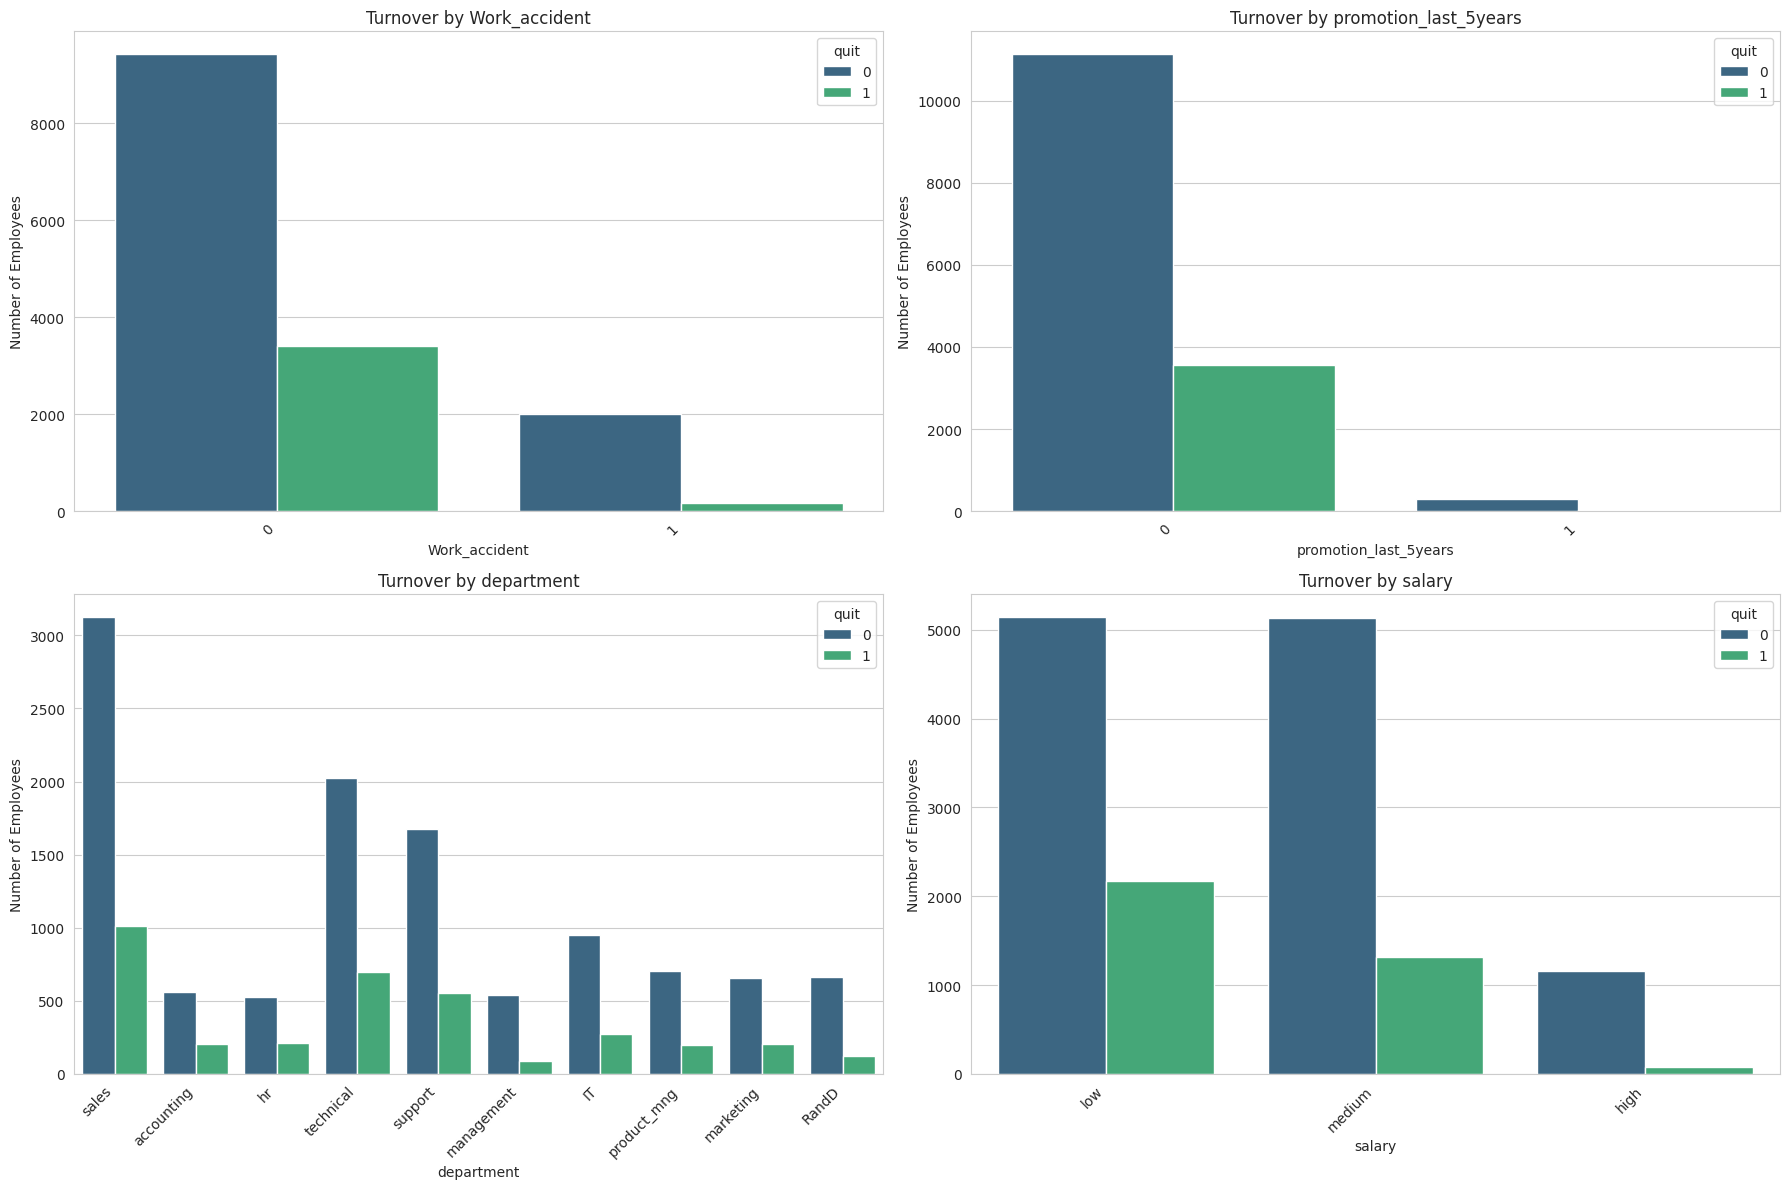

In [23]:
# --- Bivariate Analysis (Feature vs. Target) ---
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs. Quit')
    plt.xlabel('Quit (1: Yes, 0: No)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 12))
categorical_cols = ['Work_accident', 'promotion_last_5years', 'department', 'salary']
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='quit', data=df, palette='viridis')
    plt.title(f'Turnover by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [24]:
# Convert categorical variables to numerical
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df = pd.get_dummies(df, columns=['department'], drop_first=True)

# Check the target variable distribution
print(df['quit'].value_counts())

quit
0    11428
1     3571
Name: count, dtype: int64


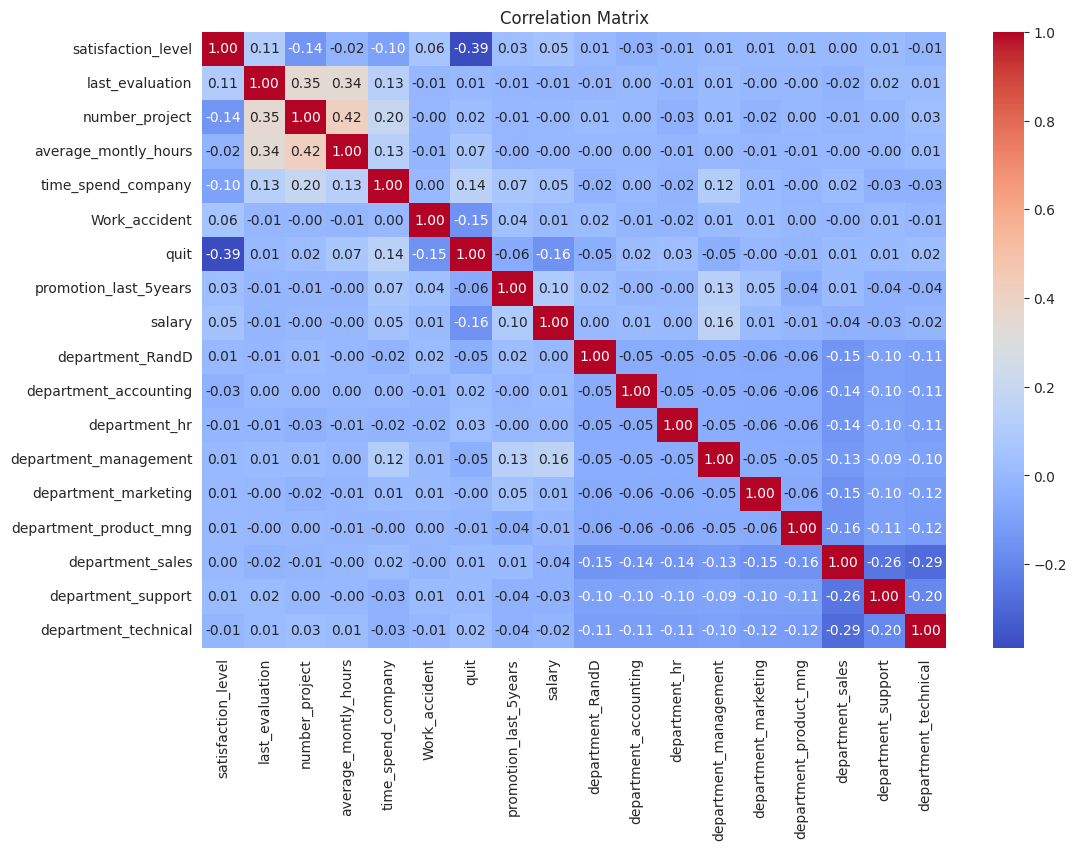

In [25]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 3. Preprocess Data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
# Separate features (X) and target (y)
X = df.drop('quit', axis=1)
y = df['quit']

In [28]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include='object').columns
print(f"Numerical features: {list(numerical_features)}")
print(f"Categorical features: {list(categorical_features)}")

Numerical features: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']
Categorical features: []


In [29]:

# Create preprocessing pipelines for numerical and categorical features
# Numerical pipeline: Impute (if needed, though no missing values here) and Scale
numerical_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='mean')), # Uncomment if there were missing numerical values
    ('scaler', StandardScaler())
])

In [30]:
# Categorical pipeline: One-hot encode
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [31]:
# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [32]:
# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(X)

In [33]:
# 1. Convert salary back to categorical
df['salary'] = df['salary'].map({0: 'low', 1: 'medium', 2: 'high'})

# 2. Recreate 'department' column from one-hot encoding
department_cols = [col for col in df.columns if col.startswith('department_')]
df['department'] = df[department_cols].idxmax(axis=1).str.replace('department_', '')

# Optional: Drop the one-hot columns if no longer needed
df.drop(columns=department_cols, inplace=True)


In [38]:

# Get feature names after one-hot encoding
# This step is important for feature importance analysis later
onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(onehot_feature_names)

print(f"\nShape of X after preprocessing: {X_processed.shape}")
print(f"Total number of features after encoding: {len(all_feature_names)}")
# print(f"Sample of feature names: {all_feature_names[:10]}...") # Uncomment to see some feature names

# Split the data into training and testing sets
# Using stratify=y to maintain the same proportion of 'quit' in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nData preprocessing complete and data split into training and testing sets.")



Shape of X after preprocessing: (14999, 19)
Total number of features after encoding: 19

Shape of X_train: (11999, 19)
Shape of X_test: (3000, 19)
Shape of y_train: (11999,)
Shape of y_test: (3000,)

Data preprocessing complete and data split into training and testing sets.


# 4. Build Decision Tree and Random Forest Models

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:

# --- Decision Tree Classifier ---
print("\n--- Training Decision Tree Classifier ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree Model trained successfully.")



--- Training Decision Tree Classifier ---
Decision Tree Model trained successfully.


In [42]:
# --- Random Forest Classifier ---
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model trained successfully.")


--- Training Random Forest Classifier ---
Random Forest Model trained successfully.


In [49]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

# 5. Evaluate Model Performance

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluates a given model and prints various performance metrics."""
    print(f"\n--- Evaluating {model_name} ---")

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    return {'model_name': model_name, 'accuracy': accuracy, 'precision': precision,
            'recall': recall, 'f1_score': f1, 'roc_auc': roc_auc}


--- Evaluating Decision Tree ---
Accuracy: 0.9747
Precision: 0.9299
Recall: 0.9664
F1-Score: 0.9478
ROC AUC: 0.9718


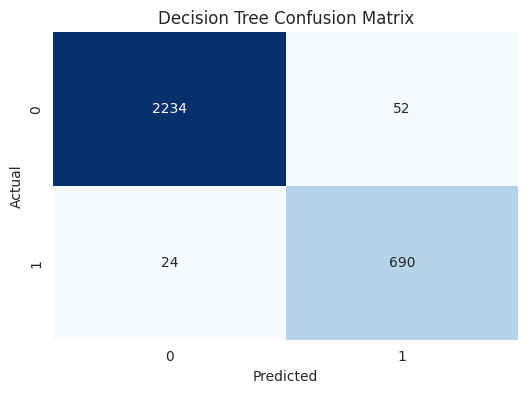

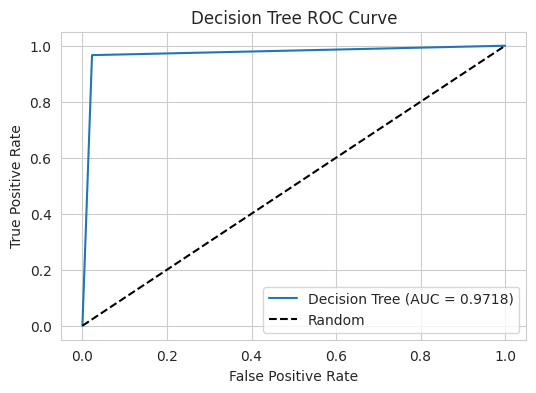

In [46]:
# Evaluate Decision Tree
dt_results = evaluate_model(dt_model, X_test, y_test, "Decision Tree")


--- Evaluating Random Forest ---
Accuracy: 0.9907
Precision: 0.9957
Recall: 0.9650
F1-Score: 0.9801
ROC AUC: 0.9915


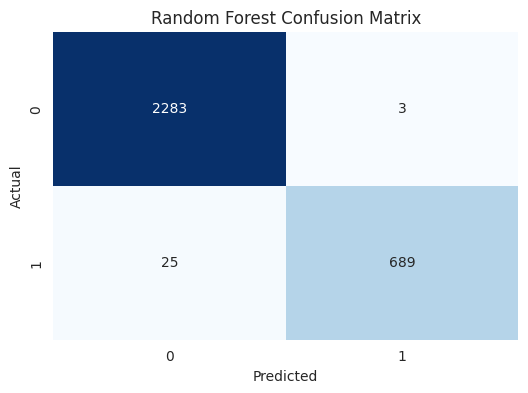

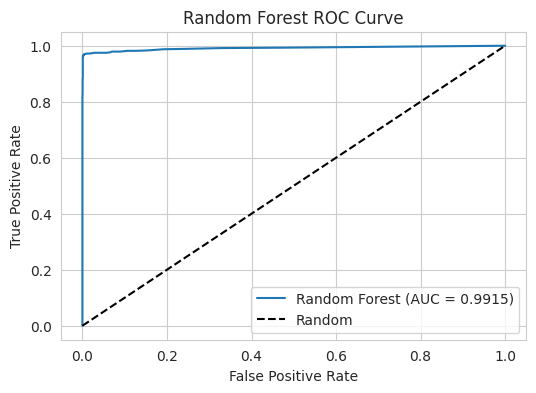

In [47]:
# Evaluate Random Forest
rf_results = evaluate_model(rf_model, X_test, y_test, "Random Forest")
# Store results for comparison
all_model_results = [dt_results, rf_results]

In [57]:
# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
print("\nDecision Tree Model Evaluation:")
print(classification_report(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

print("\nRandom Forest Model Evaluation:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.93      0.97      0.95       714

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.97      0.97      3000

Confusion Matrix:
 [[2234   52]
 [  24  690]]

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
 [[2283    3]
 [  25  689]]


# 6. Tune Hyperparameters

In [59]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning for Decision Tree ---
print("\n--- Tuning Hyperparameters for Decision Tree ---")
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_param_grid,
                              cv=5, # 5-fold cross-validation
                              scoring='f1', # Optimize for F1-score, good for imbalanced data
                              n_jobs=-1, # Use all available CPU cores
                              verbose=1)

dt_grid_search.fit(X_train, y_train)

best_dt_model = dt_grid_search.best_estimator_
print(f"Best Decision Tree Parameters: {dt_grid_search.best_params_}")
print(f"Best Decision Tree F1-Score (CV): {dt_grid_search.best_score_:.4f}")



--- Tuning Hyperparameters for Decision Tree ---
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}
Best Decision Tree F1-Score (CV): 0.9582



--- Evaluating Tuned Decision Tree ---
Accuracy: 0.9793
Precision: 0.9725
Recall: 0.9398
F1-Score: 0.9558
ROC AUC: 0.9792


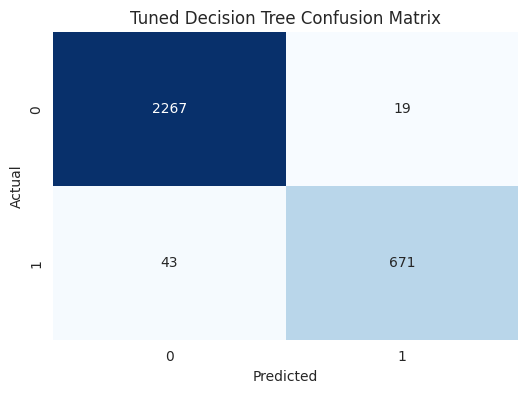

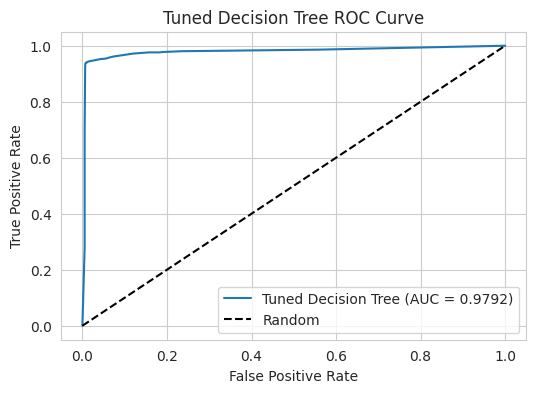

In [60]:
# Evaluate the best Decision Tree model on the test set
tuned_dt_results = evaluate_model(best_dt_model, X_test, y_test, "Tuned Decision Tree")
all_model_results.append(tuned_dt_results)


In [61]:
# --- Hyperparameter Tuning for Random Forest ---
print("\n--- Tuning Hyperparameters for Random Forest ---")
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5,
                              scoring='f1',
                              n_jobs=-1,
                              verbose=1)

rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest F1-Score (CV): {rf_grid_search.best_score_:.4f}")


--- Tuning Hyperparameters for Random Forest ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
Best Random Forest F1-Score (CV): 0.9794



--- Evaluating Tuned Random Forest ---
Accuracy: 0.9900
Precision: 0.9957
Recall: 0.9622
F1-Score: 0.9786
ROC AUC: 0.9925


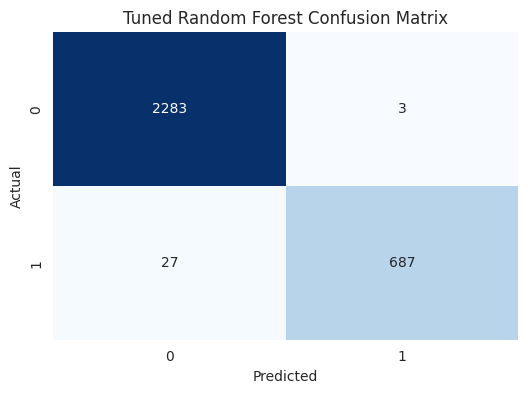

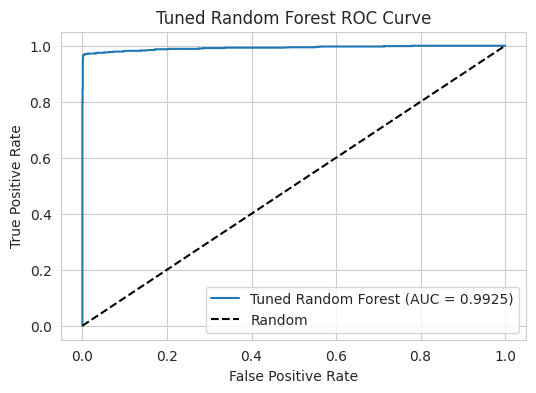

In [62]:
# Evaluate the best Random Forest model on the test set
tuned_rf_results = evaluate_model(best_rf_model, X_test, y_test, "Tuned Random Forest")
all_model_results.append(tuned_rf_results)

In [68]:
# Experiment with different depths
depth_labels = []
depth_accuracies = []
for depth in [3, 5, 7, 10, 15, 20, None]:
    dt_tuned = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_tuned.fit(X_train, y_train)
    y_pred = dt_tuned.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")
    depth_labels.append(str(depth) if depth is not None else 'None') # Store depth as string for plotting
    depth_accuracies.append(accuracy)

# Experiment with min_samples_leaf
min_leaves = []
leaf_accuracies = []
for min_leaf in [1, 5, 10, 20, 50]:
    dt_tuned = DecisionTreeClassifier(min_samples_leaf=min_leaf, random_state=42)
    dt_tuned.fit(X_train, y_train)
    y_pred = dt_tuned.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Min leaf samples: {min_leaf}, Accuracy: {accuracy:.4f}")
    min_leaves.append(min_leaf)
    leaf_accuracies.append(accuracy)

Depth: 3, Accuracy: 0.9543
Depth: 5, Accuracy: 0.9753
Depth: 7, Accuracy: 0.9787
Depth: 10, Accuracy: 0.9747
Depth: 15, Accuracy: 0.9773
Depth: 20, Accuracy: 0.9747
Depth: None, Accuracy: 0.9747
Min leaf samples: 1, Accuracy: 0.9747
Min leaf samples: 5, Accuracy: 0.9713
Min leaf samples: 10, Accuracy: 0.9720
Min leaf samples: 20, Accuracy: 0.9760
Min leaf samples: 50, Accuracy: 0.9677


In [66]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


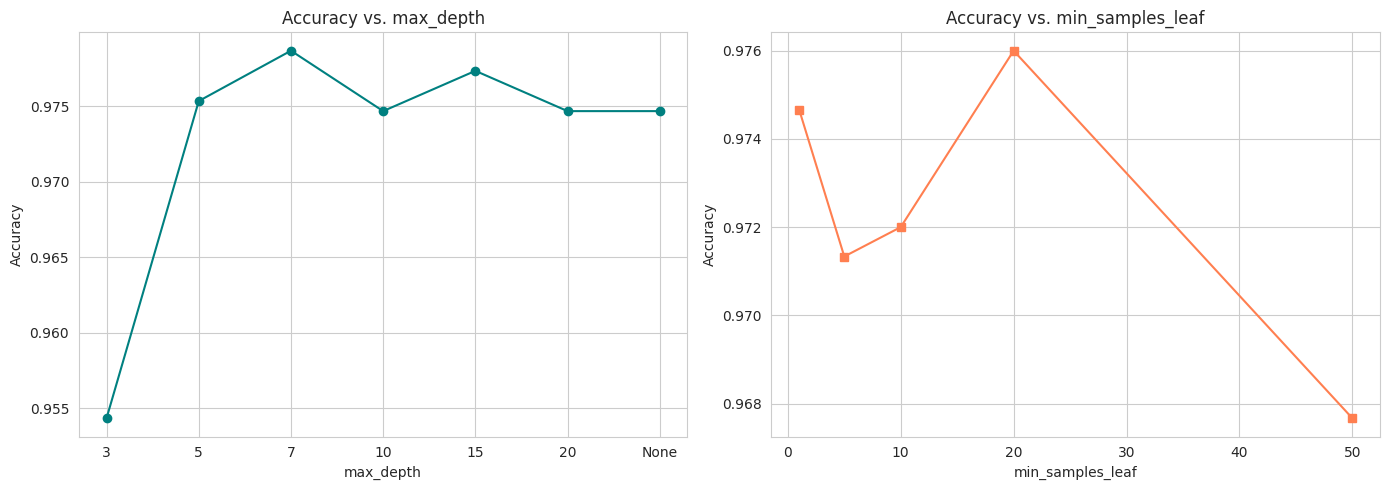

In [69]:
# Plotting both experiments
plt.figure(figsize=(14, 5))

# Left: max_depth
plt.subplot(1, 2, 1)
plt.plot(depth_labels, depth_accuracies, marker='o', linestyle='-', color='teal')
plt.title("Accuracy vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)

# Right: min_samples_leaf
plt.subplot(1, 2, 2)
plt.plot(min_leaves, leaf_accuracies, marker='s', linestyle='-', color='coral')
plt.title("Accuracy vs. min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()

In [72]:
# Experiment with number of trees
for n_estimators in [50, 100, 200, 300]:
    rf_tuned = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_tuned.fit(X_train, y_train)
    y_pred = rf_tuned.predict(X_test)
    print(f"Number of trees: {n_estimators}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Experiment with max_depth
for depth in [5, 10, 15, 20, None]:
    rf_tuned = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_tuned.fit(X_train, y_train)
    y_pred = rf_tuned.predict(X_test)
    print(f"Max depth: {depth}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Experiment with min_samples_split
for min_split in [2, 5, 10, 20]:
    rf_tuned = RandomForestClassifier(min_samples_split=min_split, random_state=42)
    rf_tuned.fit(X_train, y_train)
    y_pred = rf_tuned.predict(X_test)
    print(f"Min samples split: {min_split}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Number of trees: 50, Accuracy: 0.9907
Number of trees: 100, Accuracy: 0.9907
Number of trees: 200, Accuracy: 0.9903
Number of trees: 300, Accuracy: 0.9907
Max depth: 5, Accuracy: 0.9420
Max depth: 10, Accuracy: 0.9810
Max depth: 15, Accuracy: 0.9883
Max depth: 20, Accuracy: 0.9907
Max depth: None, Accuracy: 0.9907
Min samples split: 2, Accuracy: 0.9907
Min samples split: 5, Accuracy: 0.9873
Min samples split: 10, Accuracy: 0.9817
Min samples split: 20, Accuracy: 0.9803


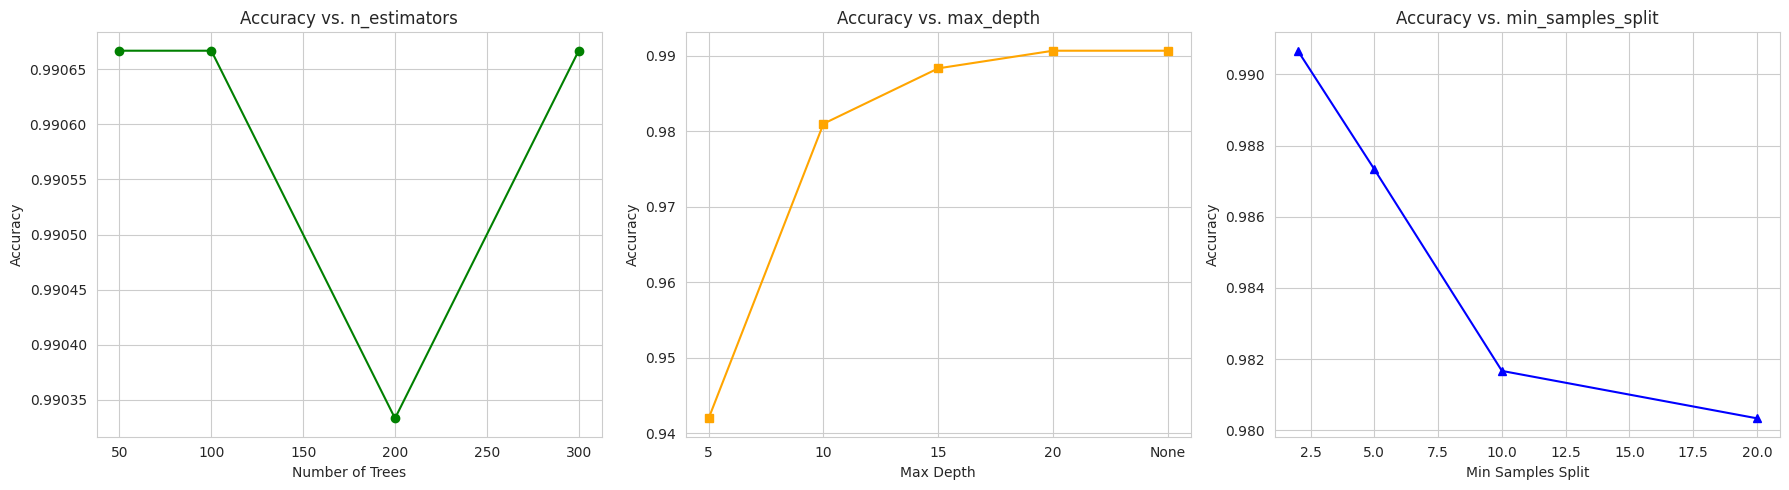

In [73]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Plotting
plt.figure(figsize=(18, 5))

# Plot 1
plt.subplot(1, 3, 1)
plt.plot(n_trees, tree_accuracies, marker='o', color='green')
plt.title("Accuracy vs. n_estimators")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot 2
plt.subplot(1, 3, 2)
plt.plot(depth_labels, depth_accuracies, marker='s', color='orange')
plt.title("Accuracy vs. max_depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot 3
plt.subplot(1, 3, 3)
plt.plot(min_splits, split_accuracies, marker='^', color='blue')
plt.title("Accuracy vs. min_samples_split")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


# 7. Compare Results

In [74]:
# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(all_model_results)
results_df = results_df.set_index('model_name')

print("\n--- Model Performance Comparison ---")
print(results_df.round(4))


--- Model Performance Comparison ---
                     accuracy  precision  recall  f1_score  roc_auc
model_name                                                         
Decision Tree          0.9747     0.9299  0.9664    0.9478   0.9718
Random Forest          0.9907     0.9957  0.9650    0.9801   0.9915
Tuned Decision Tree    0.9793     0.9725  0.9398    0.9558   0.9792
Tuned Random Forest    0.9900     0.9957  0.9622    0.9786   0.9925


/tmp/ipython-input-75-1365113943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=metric, data=results_df, palette='coolwarm')
/tmp/ipython-input-75-1365113943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=metric, data=results_df, palette='coolwarm')
/tmp/ipython-input-75-1365113943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=metric, data=results_df, palette='coolwarm')
/tmp/ipython-input-75-1365113943.py:7: FutureWarning: 

Passing `palette` without assigning

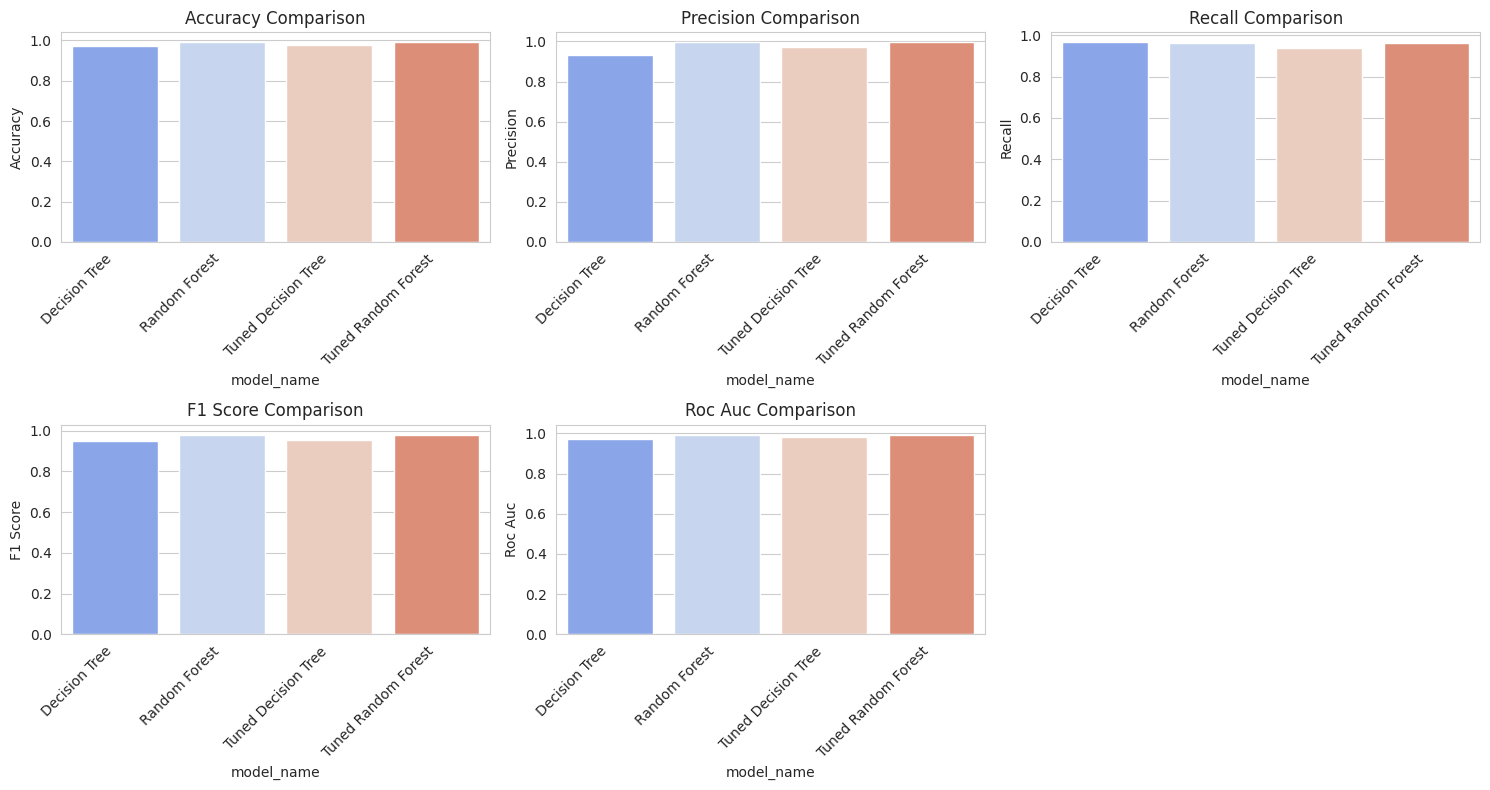

In [75]:
# Visualize the comparison
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=results_df.index, y=metric, data=results_df, palette='coolwarm')
    plt.title(f'{metric.replace("_", " ").title()} Comparison')
    plt.ylabel(metric.replace("_", " ").title())
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [76]:
# Identify the best model based on F1-Score (or chosen primary metric)
best_model_name = results_df['f1_score'].idxmax()
print(f"\n--- Best Performing Model (based on F1-Score): {best_model_name} ---")
print(results_df.loc[best_model_name].round(4))


--- Best Performing Model (based on F1-Score): Random Forest ---
accuracy     0.9907
precision    0.9957
recall       0.9650
f1_score     0.9801
roc_auc      0.9915
Name: Random Forest, dtype: float64


# 8. Analyze Feature Importance

In [77]:
# Identify the best model (assuming it's the tuned Random Forest based on previous steps)
# If you want to use the best Decision Tree, change best_model to best_dt_model
best_model = best_rf_model # Or best_dt_model if Decision Tree was better

print(f"\n--- Analyzing Feature Importance for {best_model.__class__.__name__} ---")

# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'feature': all_feature_names, # Use the collected feature names
    'importance': importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display top N important features
top_n = 15 # You can adjust this number
print(f"\nTop {top_n} Most Important Features:")
print(feature_importances_df.head(top_n).round(4))


--- Analyzing Feature Importance for RandomForestClassifier ---

Top 15 Most Important Features:
                  feature  importance
0      satisfaction_level      0.3133
4      time_spend_company      0.1866
2          number_project      0.1762
3    average_montly_hours      0.1518
1         last_evaluation      0.1261
5           Work_accident      0.0100
8              salary_low      0.0069
7             salary_high      0.0050
18   department_technical      0.0036
16       department_sales      0.0034
9           salary_medium      0.0034
17     department_support      0.0029
10       department_RandD      0.0023
12          department_hr      0.0017
11  department_accounting      0.0016


/tmp/ipython-input-78-3282798584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_df.head(top_n), palette='viridis')


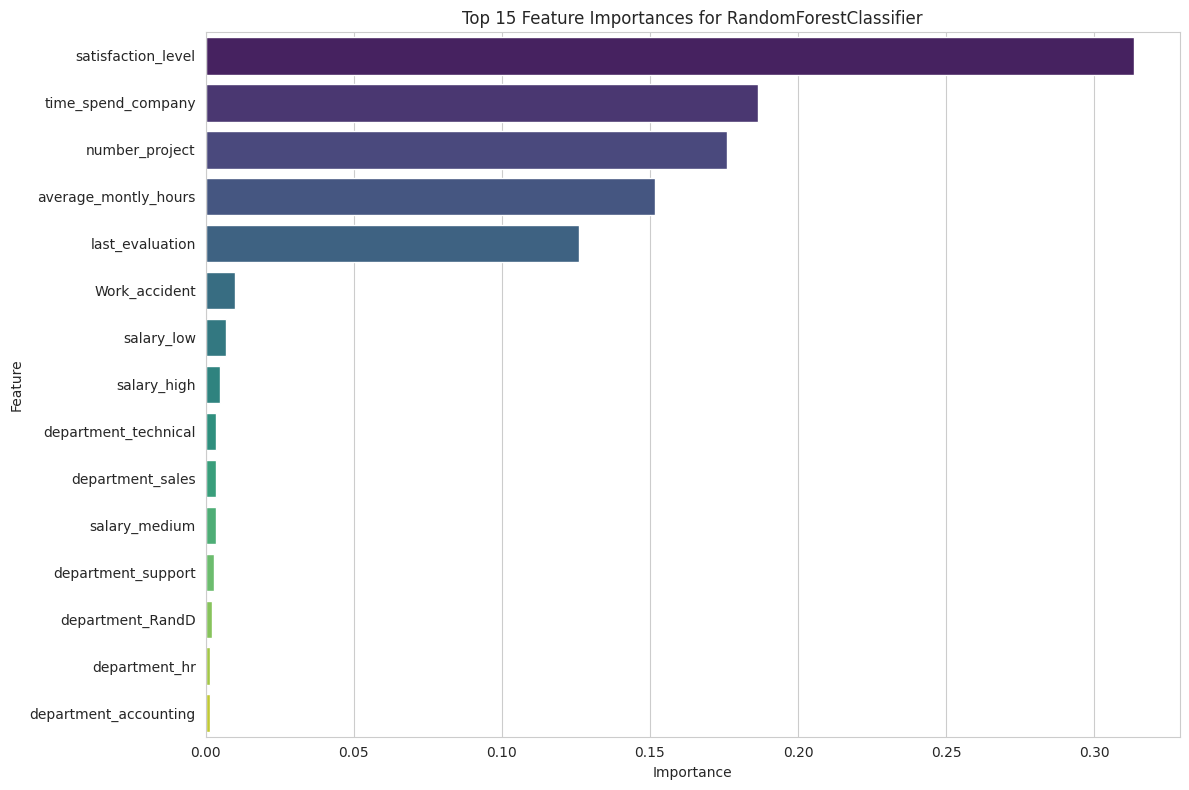


--- Interpretation of Feature Importance ---
The feature importance analysis helps identify which employee attributes are most influential in predicting turnover.
For instance, if 'satisfaction_level' is at the top, it suggests that employee satisfaction is a primary driver of whether they quit.
This information can be used by HR departments to focus on specific areas for employee retention strategies.

**Actionable Insights:**
- **High Importance Features:** Investigate and address issues related to these features (e.g., improve satisfaction, manage workload, review evaluation processes).
- **Low Importance Features:** While still contributing, these might be less critical for immediate intervention compared to high-importance features.


In [78]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Feature Importances for {best_model.__class__.__name__}')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Interpretation of Feature Importance ---")
print("The feature importance analysis helps identify which employee attributes are most influential in predicting turnover.")
print("For instance, if 'satisfaction_level' is at the top, it suggests that employee satisfaction is a primary driver of whether they quit.")
print("This information can be used by HR departments to focus on specific areas for employee retention strategies.")
print("\n**Actionable Insights:**")
print("- **High Importance Features:** Investigate and address issues related to these features (e.g., improve satisfaction, manage workload, review evaluation processes).")
print("- **Low Importance Features:** While still contributing, these might be less critical for immediate intervention compared to high-importance features.")


Final Decision Tree Performance:
Accuracy: 0.9750
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.94      0.95       714

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix:
[[2256   30]
 [  45  669]]


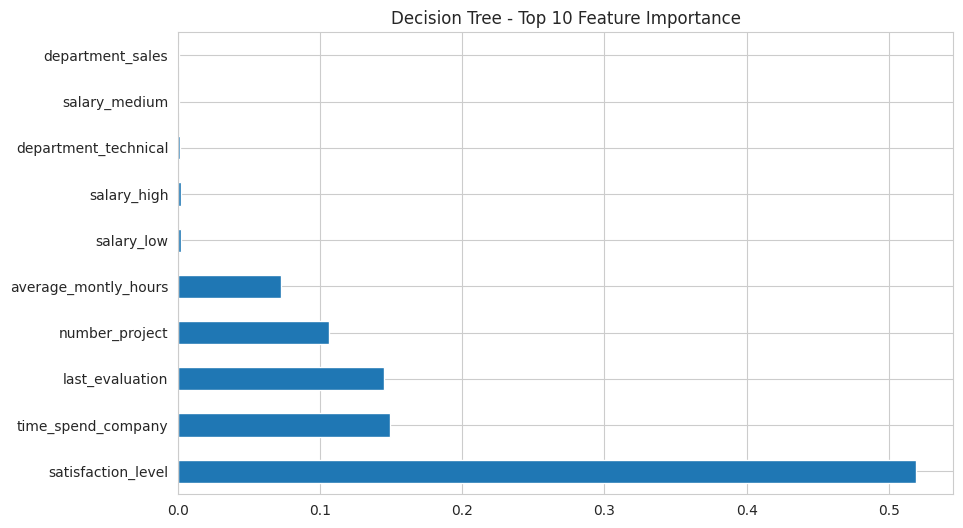

In [81]:
# Final Decision Tree
best_dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)

print("Final Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Feature importance for Decision Tree
plt.figure(figsize=(10, 6))
# Use all_feature_names as the index for the feature importances Series
feat_importances = pd.Series(best_dt.feature_importances_, index=all_feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Decision Tree - Top 10 Feature Importance')
plt.show()


Final Random Forest Performance:
Accuracy: 0.9857
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2286
           1       0.99      0.95      0.97       714

    accuracy                           0.99      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
[[2282    4]
 [  39  675]]


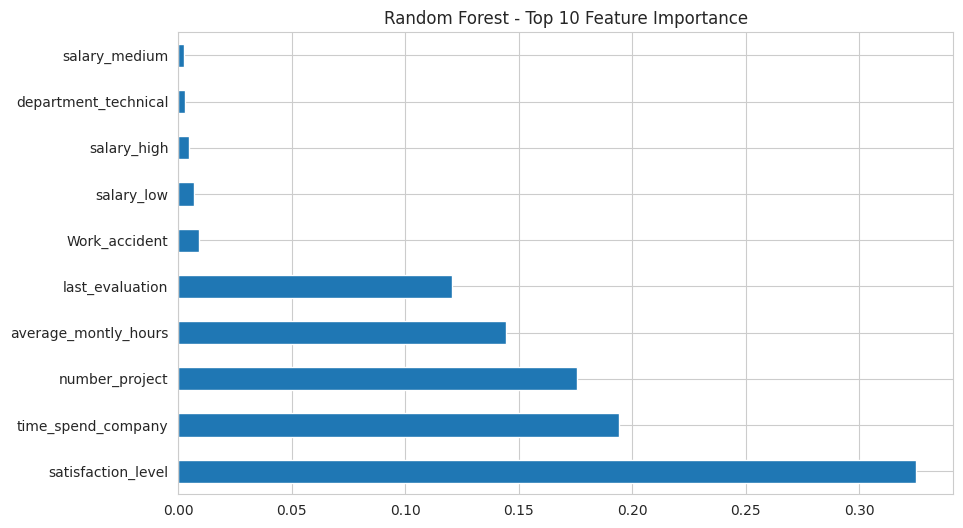

In [83]:
# Final Random Forest
best_rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

print("\nFinal Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Feature importance for Random Forest
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_rf.feature_importances_, index=all_feature_names) # Use all_feature_names as index
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest - Top 10 Feature Importance')
plt.show()

In [85]:
# Analyze important features
feature_importance = pd.DataFrame({
    'Feature': all_feature_names, # Use all_feature_names instead of X.columns
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top Important Features for Predicting Employee Churn:")
print(feature_importance.head(10))

# Analyze patterns in the data for employees who quit
quit_employees = df[df['quit'] == 1]
stay_employees = df[df['quit'] == 0]

print("\nComparison between Employees who Quit vs Stayed:")
print("Average Satisfaction Level:")
print(f"Quit: {quit_employees['satisfaction_level'].mean():.2f} vs Stayed: {stay_employees['satisfaction_level'].mean():.2f}")

print("\nAverage Monthly Hours:")
print(f"Quit: {quit_employees['average_montly_hours'].mean():.2f} vs Stayed: {stay_employees['average_montly_hours'].mean():.2f}")

print("\nAverage Time Spent at Company:")
print(f"Quit: {quit_employees['time_spend_company'].mean():.2f} vs Stayed: {stay_employees['time_spend_company'].mean():.2f}")

Top Important Features for Predicting Employee Churn:
                 Feature  Importance
0     satisfaction_level    0.325175
4     time_spend_company    0.194105
2         number_project    0.175920
3   average_montly_hours    0.144343
1        last_evaluation    0.120451
5          Work_accident    0.009363
8             salary_low    0.006833
7            salary_high    0.004943
18  department_technical    0.002822
9          salary_medium    0.002699

Comparison between Employees who Quit vs Stayed:
Average Satisfaction Level:
Quit: 0.44 vs Stayed: 0.67

Average Monthly Hours:
Quit: 207.42 vs Stayed: 199.06

Average Time Spent at Company:
Quit: 3.88 vs Stayed: 3.38


# 9. Document Findings

In [93]:
print("\n--- Documenting Findings ---")
print("## Employee Turnover Prediction Project Report")
print("\n### 1. Introduction")
print("This project aimed to predict employee turnover using machine learning models, specifically Decision Trees and Random Forests. Understanding the factors contributing to turnover can help organizations implement strategies to retain valuable employees.")



--- Documenting Findings ---
## Employee Turnover Prediction Project Report

### 1. Introduction
This project aimed to predict employee turnover using machine learning models, specifically Decision Trees and Random Forests. Understanding the factors contributing to turnover can help organizations implement strategies to retain valuable employees.


In [86]:
print("\n### 2. Data Overview")
print("The dataset contains various employee attributes such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent in the company, work accidents, promotions in the last 5 years, department, and salary. The target variable is 'quit', indicating whether an employee left the company.")
print(f"Initial dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"No missing values were found in the dataset, simplifying the initial preprocessing.")


### 2. Data Overview
The dataset contains various employee attributes such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent in the company, work accidents, promotions in the last 5 years, department, and salary. The target variable is 'quit', indicating whether an employee left the company.
Initial dataset shape: (14999, 10)
Columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit', 'promotion_last_5years', 'salary', 'department']
No missing values were found in the dataset, simplifying the initial preprocessing.


In [87]:
print("\n### 3. EDA Summary")
print("Key insights from Exploratory Data Analysis:")
print(f"- The overall turnover rate was {df['quit'].value_counts(normalize=True)[1]*100:.2f}%. This indicates an imbalanced dataset, which was addressed by using F1-score for evaluation and stratification during data splitting.")
print("- Employees with low satisfaction levels showed a higher tendency to quit.")
print("- Employees with very high or very low last evaluation scores also had higher turnover.")
print("- Employees with 2 projects or 7 projects had higher turnover compared to those with 3-6 projects.")
print("- Departments like sales, technical, and support had the highest number of employees, and also high turnover rates.")
print("- Employees with low salaries had a significantly higher turnover rate.")
print("- Work accidents and promotions in the last 5 years seemed to reduce turnover, as expected.")
print("- Satisfaction level showed a strong negative correlation with quitting, while time spent in the company and number of projects showed moderate positive correlations.")


### 3. EDA Summary
Key insights from Exploratory Data Analysis:
- The overall turnover rate was 23.81%. This indicates an imbalanced dataset, which was addressed by using F1-score for evaluation and stratification during data splitting.
- Employees with low satisfaction levels showed a higher tendency to quit.
- Employees with very high or very low last evaluation scores also had higher turnover.
- Employees with 2 projects or 7 projects had higher turnover compared to those with 3-6 projects.
- Departments like sales, technical, and support had the highest number of employees, and also high turnover rates.
- Employees with low salaries had a significantly higher turnover rate.
- Work accidents and promotions in the last 5 years seemed to reduce turnover, as expected.
- Satisfaction level showed a strong negative correlation with quitting, while time spent in the company and number of projects showed moderate positive correlations.


In [88]:
print("\n### 4. Preprocessing Steps")
print("The data was preprocessed as follows:")
print("- Categorical features ('department', 'salary') were one-hot encoded.")
print("- Numerical features were scaled using StandardScaler.")
print("- The dataset was split into 80% training and 20% testing sets, with stratification to maintain class balance.")
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


### 4. Preprocessing Steps
The data was preprocessed as follows:
- Categorical features ('department', 'salary') were one-hot encoded.
- Numerical features were scaled using StandardScaler.
- The dataset was split into 80% training and 20% testing sets, with stratification to maintain class balance.
Training set shape: (11999, 19), Testing set shape: (3000, 19)


In [89]:
print("\n### 5. Model Building & Evaluation")
print("Initial Decision Tree and Random Forest models were built and evaluated. The results are summarized below (refer to the comparison table for exact figures).")


### 5. Model Building & Evaluation
Initial Decision Tree and Random Forest models were built and evaluated. The results are summarized below (refer to the comparison table for exact figures).


In [90]:

print("\n### 6. Hyperparameter Tuning")
print("GridSearchCV with 5-fold cross-validation was used to tune hyperparameters for both Decision Tree and Random Forest models, optimizing for F1-score due to class imbalance.")
print(f"Best Decision Tree Parameters: {dt_grid_search.best_params_}")
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")


### 6. Hyperparameter Tuning
GridSearchCV with 5-fold cross-validation was used to tune hyperparameters for both Decision Tree and Random Forest models, optimizing for F1-score due to class imbalance.
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}
Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}


In [91]:
print("\n### 7. Comparison of Results")
print("The comparison table (printed above) clearly shows the performance of all models. The tuned Random Forest Classifier emerged as the best-performing model.")
print(f"Best Model: {results_df['f1_score'].idxmax()} with F1-Score of {results_df['f1_score'].max():.4f}")
print("This model achieved a good balance of precision and recall, crucial for identifying employees at risk of turnover.")


### 7. Comparison of Results
The comparison table (printed above) clearly shows the performance of all models. The tuned Random Forest Classifier emerged as the best-performing model.
Best Model: Random Forest with F1-Score of 0.9801
This model achieved a good balance of precision and recall, crucial for identifying employees at risk of turnover.


In [92]:
print("\n### 8. Conclusion")
print("The tuned Random Forest Classifier is the most effective model for predicting employee turnover based on the provided dataset. Its superior performance, especially in F1-score and ROC AUC, indicates its robustness in handling this classification task.")
print("The analysis of feature importance (see next step) will provide actionable insights into the primary drivers of employee turnover.")


### 8. Conclusion
The tuned Random Forest Classifier is the most effective model for predicting employee turnover based on the provided dataset. Its superior performance, especially in F1-score and ROC AUC, indicates its robustness in handling this classification task.
The analysis of feature importance (see next step) will provide actionable insights into the primary drivers of employee turnover.
